In [1]:
## Cell 1: Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from coevolution_network_base import Population, Network, Simulation

In [2]:
## Cell 2: Create two populations with specified parameters and initial conditions

# Defining parameters for the populations
L = 40.0  # The length of the antigenic space (total range of possible antigenic values)
dx = 0.3  # The step size for the discretization of the antigenic space (defines the granularity of antigenic variations)
x = np.arange(-L/2, L/2, dx)  # Creating an array representing antigenic space, values ranging from -L/2 to L/2 with step size dx
r = 3  # Cross-reactivity parameter that defines how the immune response to one antigenic variant affects the response to others
M = 15  # Number of immune pressures per host (defining how many different immune responses a host can have)
beta = 2  # Transmission rate of the virus (how quickly it spreads)
alpha = 1  # Death rate of the virus (how quickly it is cleared or controlled)
gamma = 0  # Recovery rate (rate at which hosts recover from infections - it's set to 0, meaning there's no recovery)
D = 0.01  # Mutation rate (or diffusion rate - defining how quickly the virus antigenically changes)
Nh = 10**6  # Number of hosts in each population (defines the scale of the population)

# Initializing viral and immune densities for two populations
viral_density = np.where(np.abs(x) <= 0.5 , 100.0, 0)  # Initializing viral density such that it has high values (100) in the center of antigenic space and 0 elsewhere
viral_density2 = np.zeros_like(viral_density)  # Initializing the viral density of second population as zeros (no initial viral load)
immune_density = np.zeros_like(viral_density)  # Initializing the immune density as zeros (no initial immune response)

# Creating two Population objects with the defined parameters and initial conditions
population1 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density)  # Creating the first population with the specified parameters and initial viral and immune densities
population2 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density)  # Creating the second population with similar parameters but different initial viral density


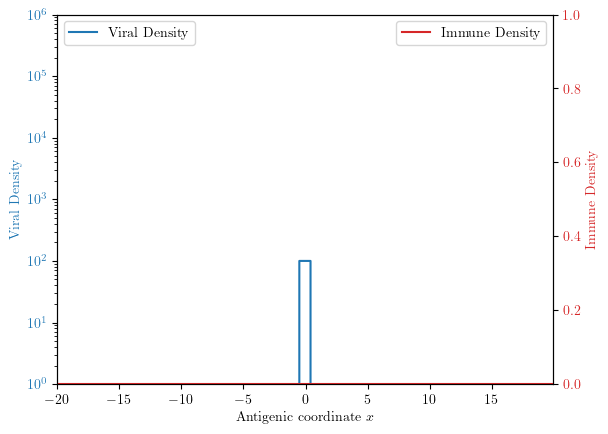

In [3]:
population1.plot() # You can call this to plot the population densities on dual axes

In [4]:
## NOTE: the first time you run this it will be slow (just in time compilation), run it twice :^)

population1.single_step_evolve(dt=0.05) # you can call this to evolve the population forward by dt = 0.05 time units

for j in range(200):
    population1.single_step_evolve(dt=0.05) # you can use a loop to do this many times

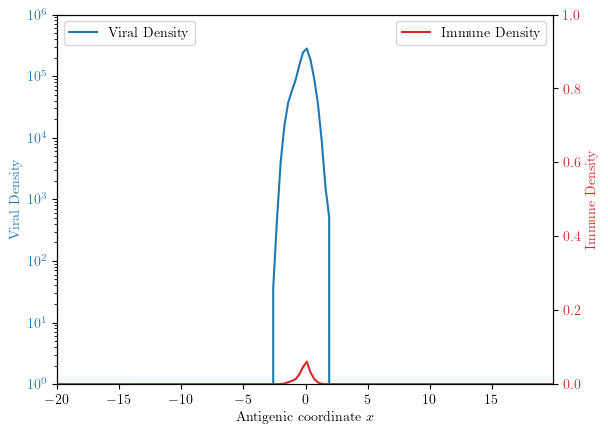

In [5]:
population1.plot() # and plot it again to see the result

In [6]:
## Cell 3: Create a migration matrix and a Network object
migration_matrix = np.array([[0, 0.1], 
                             [0.1, 0]])  

network = Network([population1, population2], migration_matrix)

In [7]:
## Cell 4: we can use a similar function to evolve the network forward in time by dt = 0.05 time units
## This evolution step evolves each population according to its local dynamics and then makes a migration step.

network.single_step_evolve_network(dt = 0.05)

In [8]:
## Cell 5: Evolve the network 300 steps into the future, dt = 0.05 here. 
for i in range(300):
    network.single_step_evolve_network(dt = 0.05)

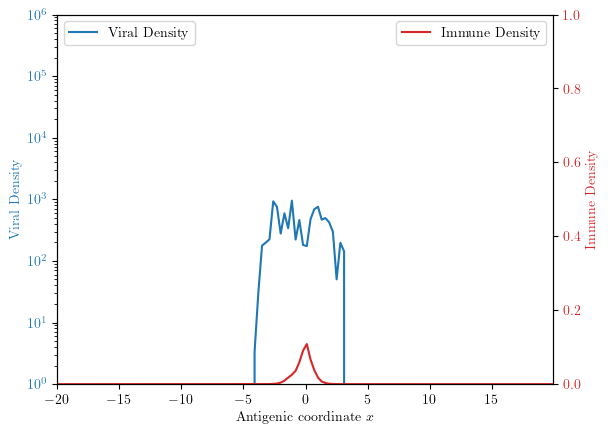

In [9]:
population1.plot()

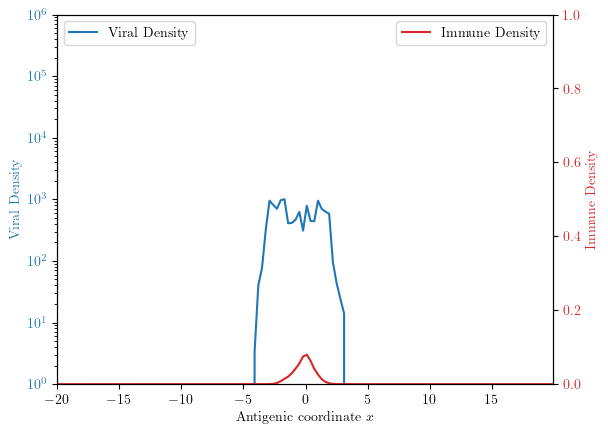

In [10]:
population2.plot()

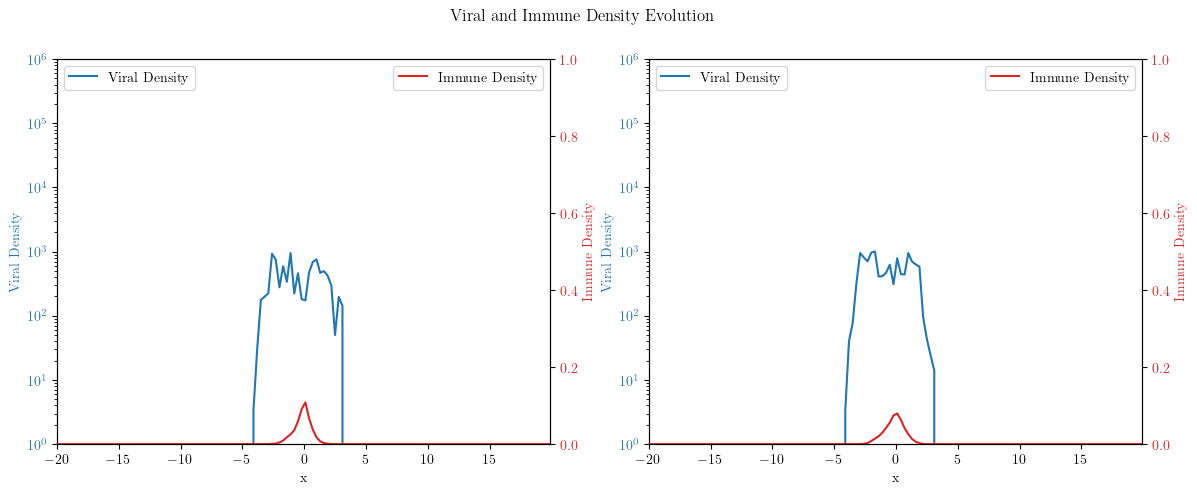

In [11]:
## This code just puts it all together, maybe this should go in the Network class somewhere...
populations = network.populations

# Setup the figure and the array of subplots
fig, axs = plt.subplots(nrows=1, ncols=len(populations), figsize=(14, 5))

# Loop through each population and plot the viral and immune densities
for i, (ax, population) in enumerate(zip(axs, populations)):
    ax1 = ax
    color = 'tab:blue'
    ax1.set_xlabel('x')
    ax1.set_ylabel('Viral Density', color=color)
    ax1.set_xlim(min(population.xs), max(population.xs))
    ax1.set_ylim(1, Nh)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_yscale('log')
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Immune Density', color=color)
    ax2.set_ylim(0, 1)
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax1.plot(population.xs, population.viral_density, color='tab:blue', label='Viral Density')
    ax2.plot(population.xs, population.immune_density, color='tab:red', label='Immune Density')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Add a title to the figure
plt.suptitle('Viral and Immune Density Evolution')

# Show the plot
plt.show()

In [12]:
## We can find the simulation time by checking 

population1.time_stamp

25.10000000000022

In [13]:
# Creating two Population objects with the defined parameters and initial conditions
population1 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density)  # Creating the first population with the specified parameters and initial viral and immune densities
population2 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density)  # Creating the second population with similar parameters but different initial viral density

dt = 0.05; final_time = 80

network = Network([population1, population2], migration_matrix)
simulation = Simulation(network,dt, final_time)

In [21]:
simulation.run_simulation()

In [22]:
len(simulation.results)

4801

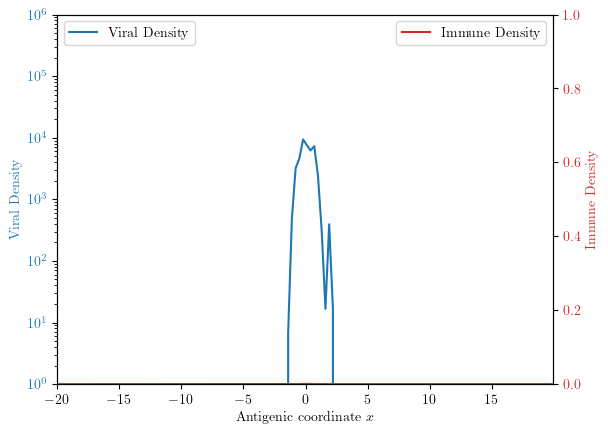

In [16]:
population1copy.plot()